# Objective: To explore the optimal NLP model for sentiment analysis 

In [1]:
# Load the dataset
import pandas as pd
df= pd.read_csv('/Users/Tory/Desktop/Fellowship/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
#Examine 3 reviews

for i in range(3):
  print('Review no.:',[i],'\n')
  print(df['review'].iloc[i],'\n')

Review no.: [0] 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

# Summary

We can see that the data contains:

- Capital letters
- Numbers
- Non-sensical text
- Punctuations

These elements will have to be removed in the data cleaning stage

# EDA

In [3]:
#Examine the daataset
df.describe() 

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
df.shape

(50000, 2)

In [5]:
#Check for null values
df.isna().any() #No null values

review       False
sentiment    False
dtype: bool

In [6]:
#Check class distribution
semtiment_count=df['sentiment'].value_counts()
semtiment_count #No class imbalance

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
#Check for duplicates
duplicates=df[df.duplicated()]
print('Number of duplicated reviews:', duplicates['review'].count()) #There are 418 duplicated reviews

Number of duplicated reviews: 418


## Summary: There are 50000 reviews in total, with equal distibution between positive and negative reviews (25000 each). There is no missing value but the dataset had 418 duplicated reviews

# Data cleaning

Data cleaning steps include:

- Label sentiment
- Drop duplicates
- Remove capital letters
- Remove punctuations
- Remove non-sensical texts
- Remove numbers
- Remove stop wrods
- Lemmatize text
- Tokenize text

In [8]:
#Drop duplicates
df=df.drop_duplicates('review')
df.shape #Only 49582 reviews left

(49582, 2)

In [9]:
#One-hot encoding of sentiments
label = {'negative':0, 'positive':1} #0=negative review; 1=positive review 
df['sentiment_map']=df['sentiment'].map(label)
df=df.drop(columns='sentiment', axis=1)
df.head()

,review,sentiment_map
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/Tory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Tory/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Data cleaning pipeline
def data_cleaning(text):
    # Remove non-sensical texts and convert texts to lowercase
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text).lower()
    # Tokenization
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    #Lemmatizing
    lemmatizer=WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    #Stemming 
    stemmer = SnowballStemmer(language='english')
    words = [stemmer.stem(w) for w in words]
    text = ' '.join(words)
    return text

In [12]:
#Install progress bar
from tqdm.notebook import tqdm
tqdm.pandas()

#Data cleaning
df['cleaned_reviews'] = df['review'].progress_apply(data_cleaning)

/Users/Tory/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Investigate the top bigrams assocaited with positive or negative reviews

In [30]:
#Split the df into 2 dfs according to the sentiment 
df_pos_reviews = df[df['sentiment_map']==1]
df_neg_reviews = df[df['sentiment_map']==0]

,review,sentiment_map,cleaned_reviews
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",1,probabl time favorit movi stori selfless sacri...
...,...,...,...
49983,"I loved it, having been a fan of the original ...",1,love fan origin seri alway wonder back stori w...
49985,Imaginary Heroes is clearly the best film of t...,1,imaginari hero clear best film year complet ut...
49989,I got this one a few weeks ago and love it! It...,1,got one week ago love modern light fill true c...
49992,John Garfield plays a Marine who is blinded by...,1,john garfield play marin blind grenad fight gu...


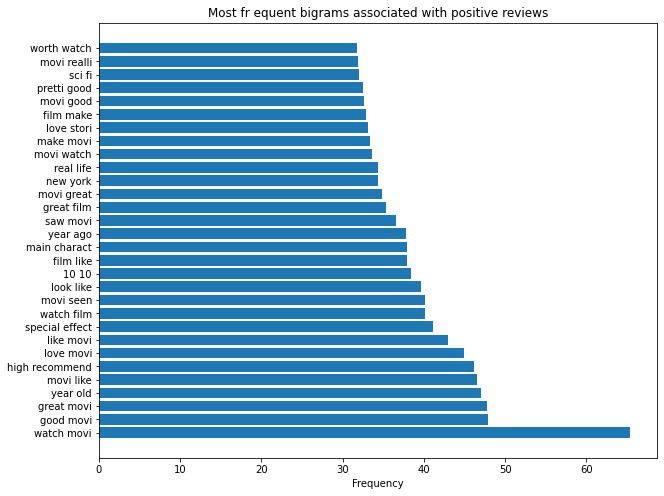

In [83]:
import matplotlib.pyplot as plt
#Get bigrams for positive reviews
def get_top_n_bigram(corpus, n=None):
    vectorizor = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bow = vectorizor.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizor.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_pos_reviews['cleaned_reviews'], 30)
df_poitive_reviews = pd.DataFrame(common_words, columns = ['bigrams' , 'count'])

#Plot the bigrams
plt.figure(figsize=(10,8))
plt.barh(df_poitive_reviews['bigrams'], df_poitive_reviews['count'])
plt.xlabel('Frequency')
plt.title('Most fr equent bigrams associated with positive reviews')
plt.show()

### It can be seen that among the top 30 post frequent bigrams in positive reviews include "main charact", "special effect", "sci fi", "love stori", suggesting the main characters, special effects could be possible reasons why people like the film, and sci fi or romantic films could be popular genre within positive reviews.

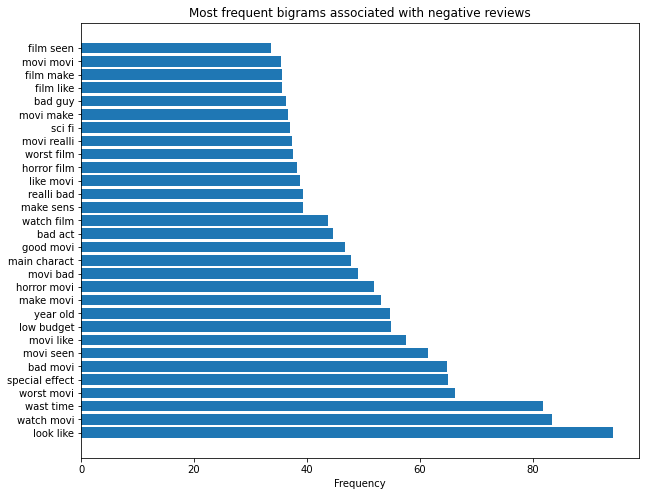

In [84]:
#Get bigrams for negative reviews
def get_top_n_bigram(corpus, n=None):
    vectorizor = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bow = vectorizor.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizor.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_neg_reviews['cleaned_reviews'], 30)
df_negative_reviews = pd.DataFrame(common_words, columns = ['bigrams' , 'count'])

#Plot the bigrams
plt.figure(figsize=(10,8))
plt.barh(df_negative_reviews['bigrams'], df_negative_reviews['count'])
plt.xlabel('Frequency')
plt.title('Most frequent bigrams associated with negative reviews')
plt.show()

### On the other hand, in negative reviews, the top 30 most frequent bigrams included "special effect", "low budget", "main charact", "horror movi", "horror film", and "bad act", suggesting a low budget film, horrom film, the choice of main character and bad acting are the most possible reasons why reviewers dislike the film.

# Summary: Some bigrams such as "main charact", "sci fi",  "special effect" are associated with both positive and negative reviews, suggesting that these could be important factors that reviewers consider whether they like the movie or not.

# Split the data into train and test set (stratified)

In [13]:
from sklearn.model_selection import train_test_split
seed=1
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_reviews'], df['sentiment_map'], test_size=0.2, random_state=seed, stratify = df['sentiment_map'])

In [14]:
y_test.value_counts() #Similar class istribution in the test set to the original dataset

1    4977
0    4940
Name: sentiment_map, dtype: int64

# Feature selection using TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

# Model selection
- Start with a regression model as base model

## Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

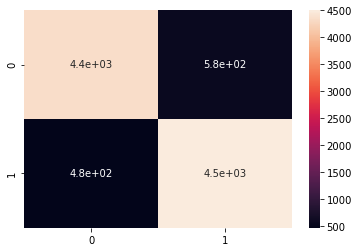

In [17]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_vector, y_train)
y_pred = clf.predict(X_test_vector)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4940
           1       0.89      0.90      0.90      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



### High scores for regression model, scoring 88% or above in all metrics

## Decision tree

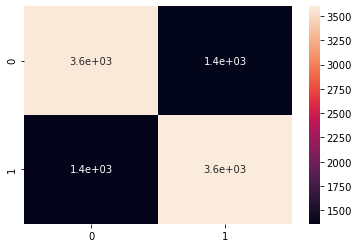

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_vector, y_train)
y_pred = tree_clf.predict(X_test_vector)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4940
           1       0.73      0.72      0.72      4977

    accuracy                           0.72      9917
   macro avg       0.72      0.72      0.72      9917
weighted avg       0.72      0.72      0.72      9917



### Summary: Lower score across the board compared with regression model, with an average score of ~72%

## Random Forest

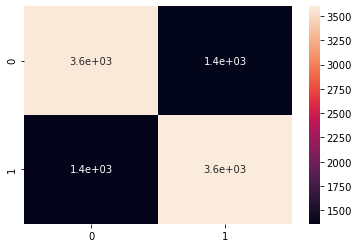

In [21]:
#Trying an ensemble method
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = seed)
rf_clf.fit(X_train_vector, y_train)
y_pred = tree_clf.predict(X_test_vector)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4940
           1       0.73      0.72      0.72      4977

    accuracy                           0.72      9917
   macro avg       0.72      0.72      0.72      9917
weighted avg       0.72      0.72      0.72      9917



## Support vector machine

In [23]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear', verbose = True)
svm_clf.fit(X_train_vector, y_train)
y_pred = svm_clf.predict(X_test_vector)
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4940
           1       0.89      0.90      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



### Summary: Similar score compared with decision tree 

## Summary: Among the 3 classifiers, logistic regression and support vector machine gave the best performace with the latter giving a slightly better overall precision and recall score. Hyperparameters tuning of the parameters in support vector machine are conducted in the following steps.

# Hyperparameters tuning - support vector machine 

In [24]:
from sklearn.model_selection import GridSearchCV

#Define hyperparameters
kernels = ['poly', 'rbf', 'sigmoid','linear']
c = [100, 10, 1.0, 0.1, 0.01, 0.001]

grid = dict(kernel=kernels, C=c)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=grid, cv=5, scoring = 'f1', verbose=10)
grid_result = grid_search.fit(X_train_vector, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START C=100, kernel=poly.........................................
[CV 1/5; 1/24] END .......................C=100, kernel=poly; total time=29.2min
[CV 2/5; 1/24] START C=100, kernel=poly.........................................
[CV 2/5; 1/24] END .......................C=100, kernel=poly; total time=29.1min
[CV 3/5; 1/24] START C=100, kernel=poly.........................................
[CV 3/5; 1/24] END .......................C=100, kernel=poly; total time=29.8min
[CV 4/5; 1/24] START C=100, kernel=poly.........................................
[CV 4/5; 1/24] END .......................C=100, kernel=poly; total time=29.1min
[CV 5/5; 1/24] START C=100, kernel=poly.........................................
[CV 5/5; 1/24] END .......................C=100, kernel=poly; total time=29.1min
[CV 1/5; 2/24] START C=100, kernel=rbf..........................................
[CV 1/5; 2/24] END ........................C=10

In [25]:
gs_y_pred = grid_search.predict(X_test_vector)
cm=confusion_matrix(y_test,gs_y_pred)
print(classification_report(y_test, gs_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4940
           1       0.89      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



# Conclusion: Support vector machine gave the best performance in classifying sentiments of the IMDB dataset compared with logistic regression classifer, decision tree and random forest

### We can see that tree-based models did not perform as well as logistic regression modeel or support vector machine, possible explanation is that the non-tree based algorithms are better at handling noisy data. Supprot vector machine focuses on maximising the margin between different classes rather than fitting the data into the model, and is more robust in handling high-dimensional data. Through hyperparameters tuning, we can see that the optimal kernal and learning rate are rbf and 100, respectively. However, the improvement is minimal compared with using a linear kernal for SVC.